<a href="https://colab.research.google.com/github/Tommy840602/OpenCV/blob/main/classification_of_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
!unzip archive.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: Images/train/Surprise/2582.jpg  
  inflating: Images/train/Surprise/2583.jpg  
  inflating: Images/train/Surprise/2584.jpg  
  inflating: Images/train/Surprise/2585.jpg  
  inflating: Images/train/Surprise/2586.jpg  
  inflating: Images/train/Surprise/2587.jpg  
  inflating: Images/train/Surprise/2588.jpg  
  inflating: Images/train/Surprise/2589.jpg  
  inflating: Images/train/Surprise/259.jpg  
  inflating: Images/train/Surprise/2590.jpg  
  inflating: Images/train/Surprise/2591.jpg  
  inflating: Images/train/Surprise/2592.jpg  
  inflating: Images/train/Surprise/2593.jpg  
  inflating: Images/train/Surprise/2594.jpg  
  inflating: Images/train/Surprise/2595.jpg  
  inflating: Images/train/Surprise/2596.jpg  
  inflating: Images/train/Surprise/2597.jpg  
  inflating: Images/train/Surprise/2598.jpg  
  inflating: Images/train/Surprise/2599.jpg  
  inflating: Images/train/Surprise/26.jpg  
  inflating: Images/train/Surprise/260.jpg  
  inflating: Imag

In [10]:
path = '/content/Images/train'

In [11]:
#Training set and testing set
train_gen = ImageDataGenerator(rescale=1./255,rotation_range=7,horizontal_flip=True,zoom_range=0.2)
train = train_gen.flow_from_directory('/content/Images/train',target_size = (48, 48),batch_size = 16,class_mode = 'categorical',shuffle = True)

Found 28709 images belonging to 7 classes.


In [12]:
train.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [13]:
train.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

<Axes: ylabel='count'>

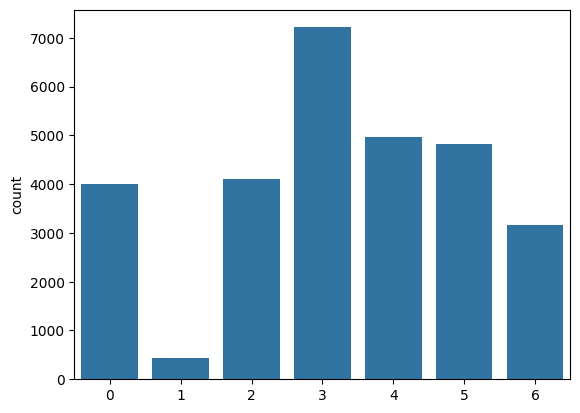

In [14]:
sns.countplot(x=train.classes)

In [15]:
folder_names = os.listdir(path)
print(folder_names)

['Neutral', 'Angry', 'Sad', 'Disgust', 'Fear', 'Happy', 'Surprise']


1123.jpg
4690.jpg
3950.jpg
1319.jpg
3697.jpg
1123.jpg
4690.jpg
3950.jpg
1319.jpg
3697.jpg
1123.jpg
1319.jpg
1086.jpg
2946.jpg
827.jpg
1123.jpg
3950.jpg
1319.jpg
3697.jpg
1086.jpg
1123.jpg
3950.jpg
1319.jpg
3697.jpg
1086.jpg
371.jpg
143.jpg
170.jpg
243.jpg
82.jpg
6052.jpg
1123.jpg
4690.jpg
3950.jpg
5529.jpg


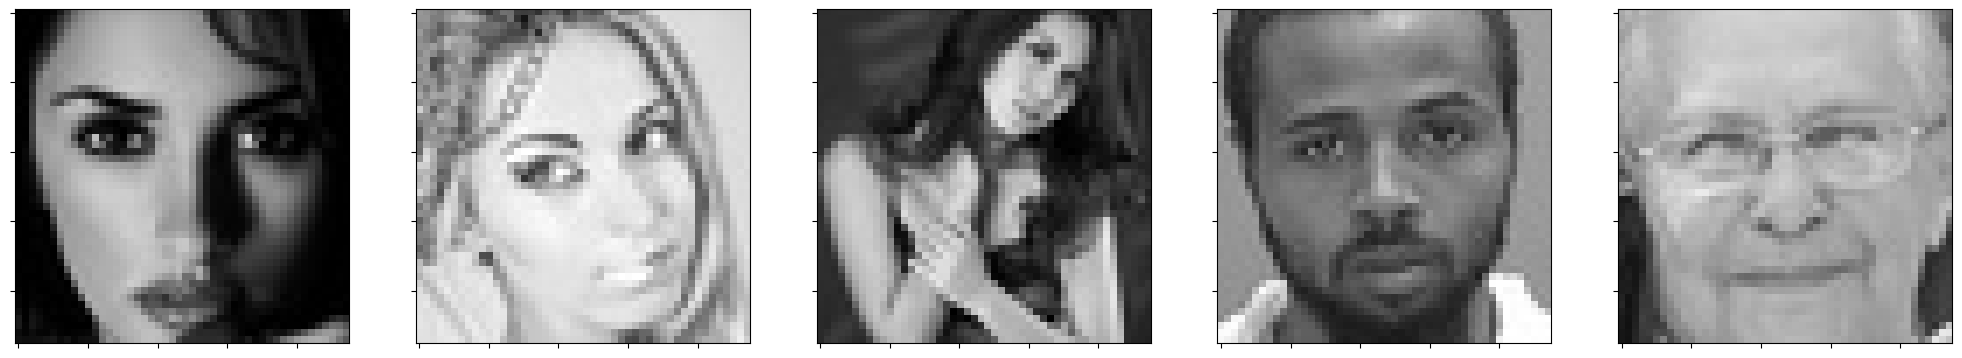

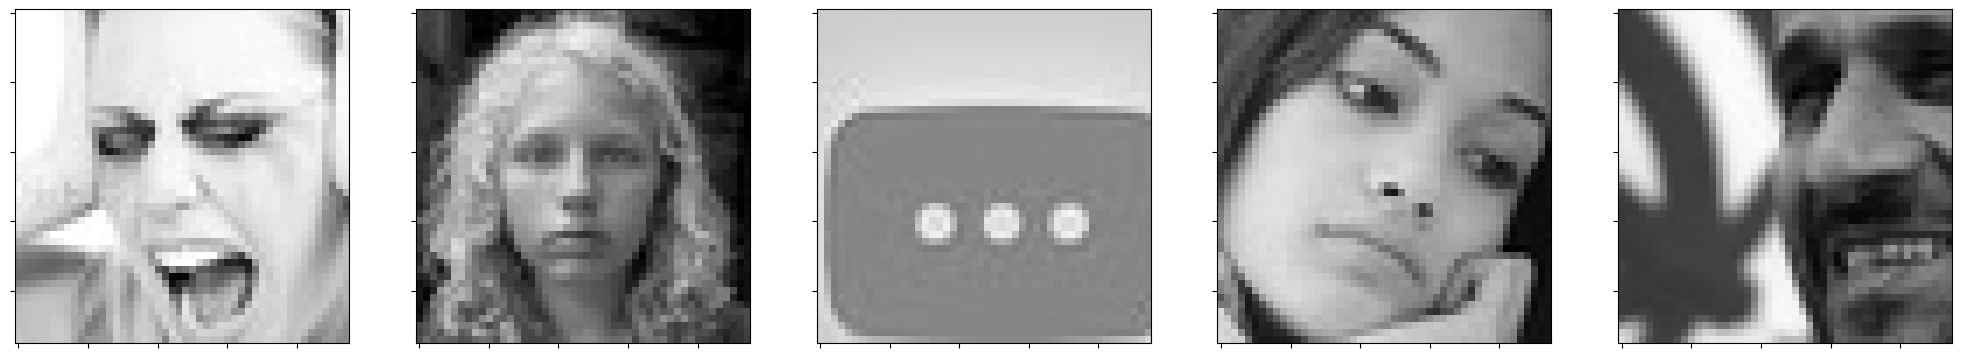

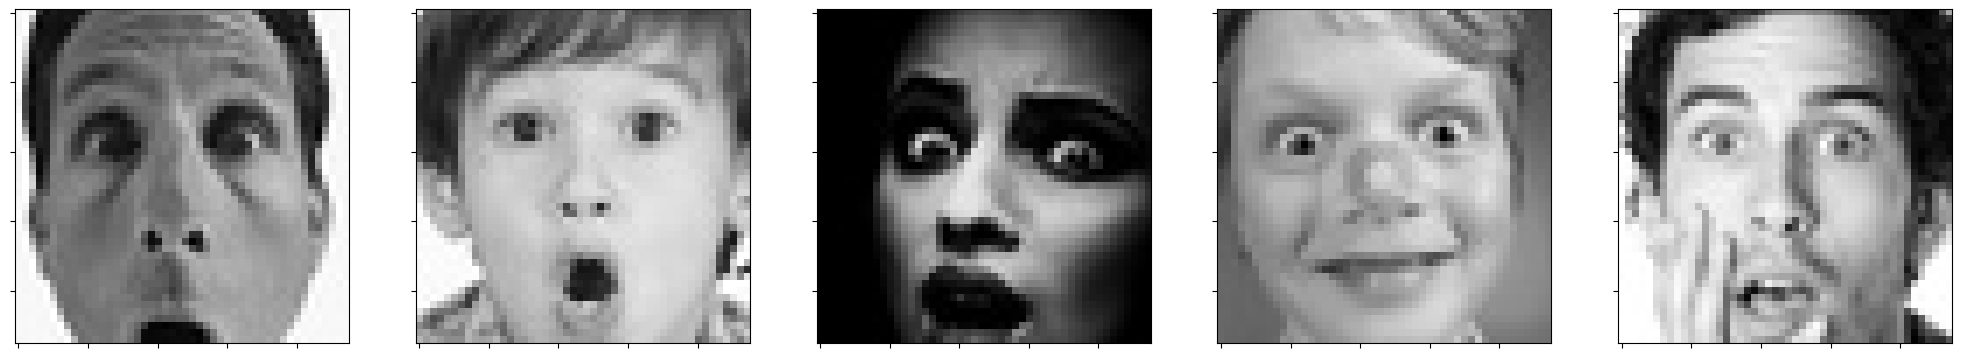

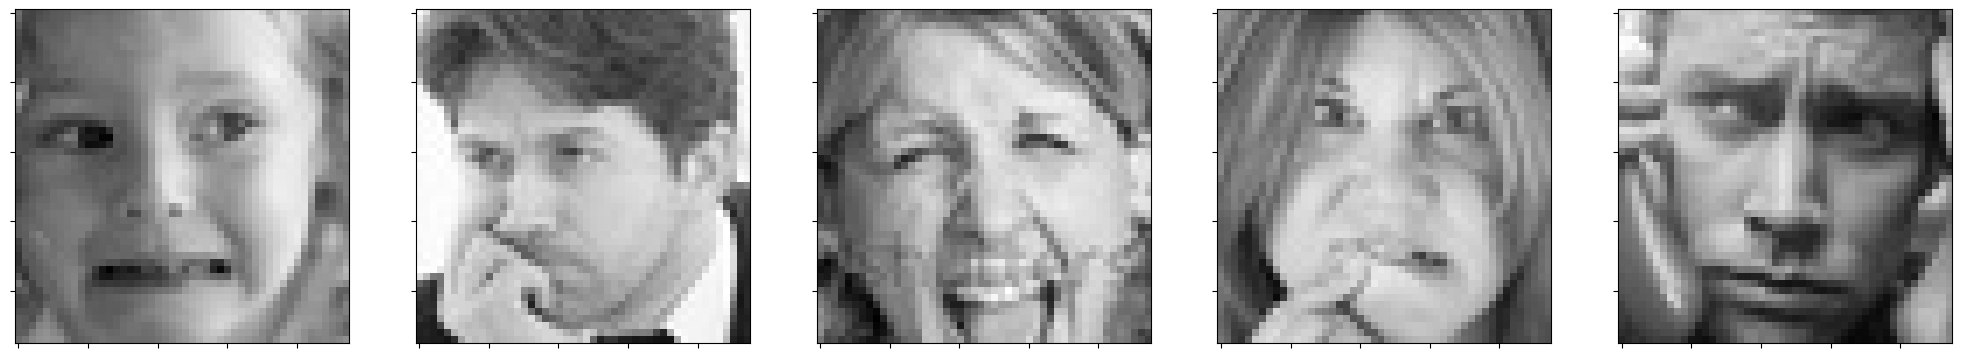

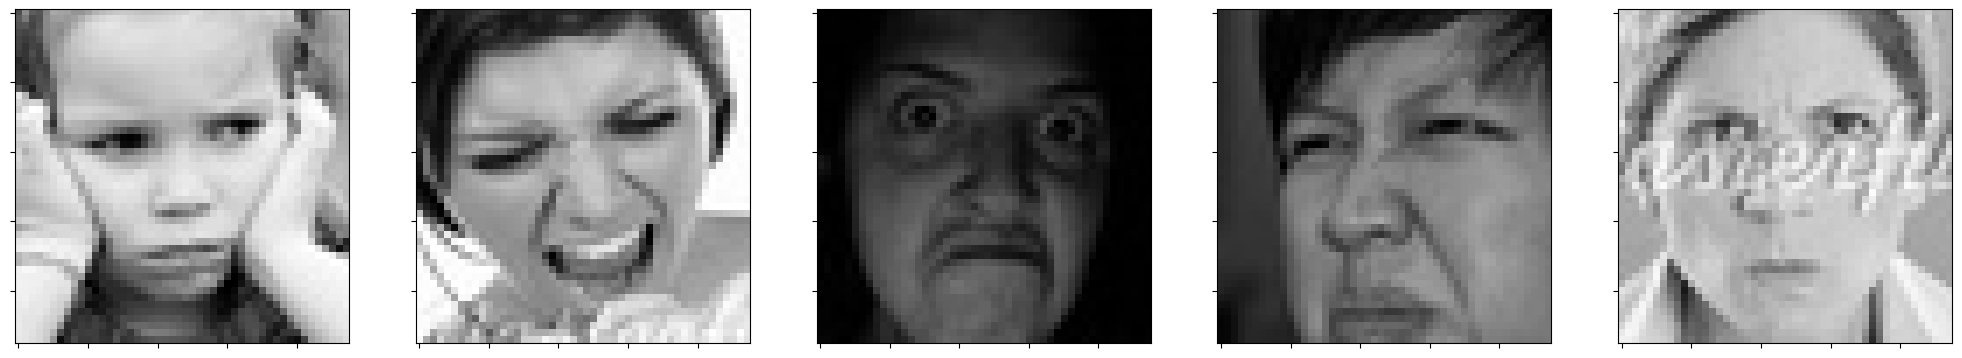

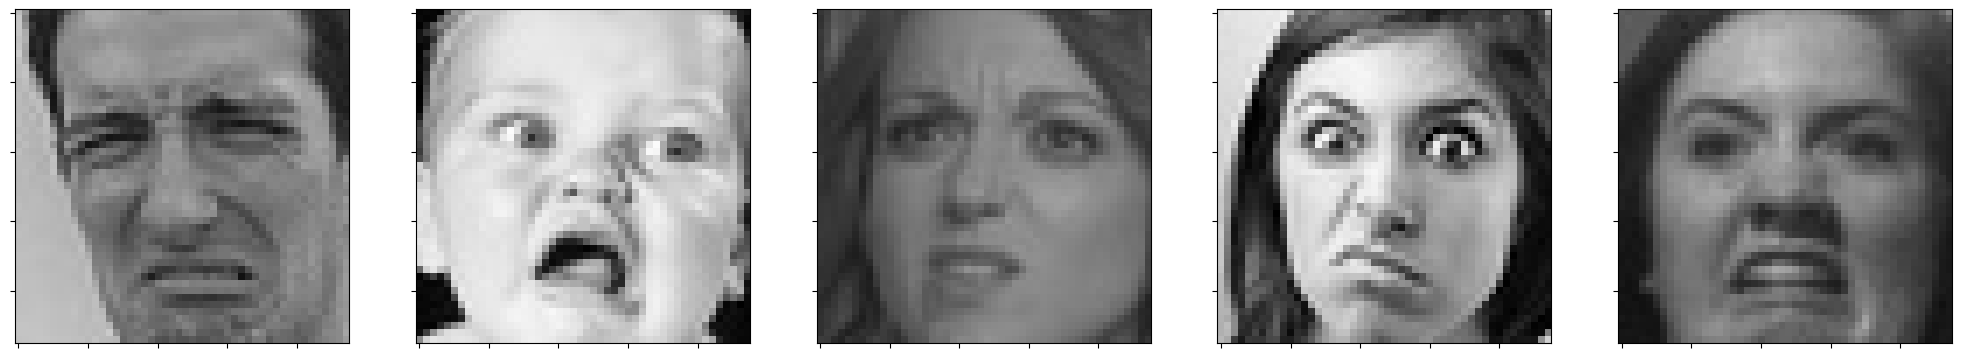

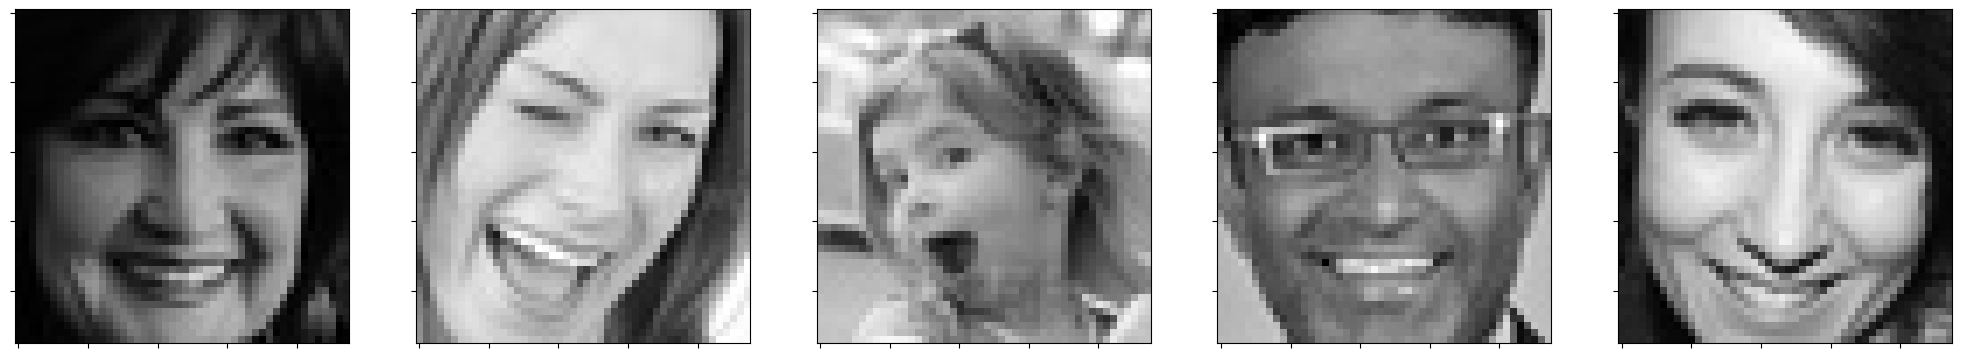

In [16]:
def plot_examples(folder_names, selected_folder, path):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    file_names = os.listdir(path + '/' + selected_folder)
    for i in range(5):
        print(file_names[i])
        img = cv2.imread(path + '/' + selected_folder + '/' + file_names[i])
        axs[i].imshow(img)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

plot_examples(folder_names,'Neutral', path)
plot_examples(folder_names,'Sad', path)
plot_examples(folder_names,'Surprise', path)
plot_examples(folder_names,'Fear', path)
plot_examples(folder_names,'Angry', path)
plot_examples(folder_names,'Disgust', path)
plot_examples(folder_names,'Happy', path)

In [23]:
test_gen = ImageDataGenerator(rescale=1./255)
test = test_gen.flow_from_directory('/content/Images/validation',target_size=(48, 48),batch_size = 1,class_mode = 'categorical',shuffle = False)

Found 3589 images belonging to 7 classes.


In [56]:
#Construction and training of the neural network
number_classes = 7
detectors_number = 32
width, height = 48, 48
epochs = 20
network = Sequential()

network.add(Conv2D(filters=number_classes, kernel_size=(3,3), activation='relu', padding='same', input_shape=(width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(filters=number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=2*2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=2*2*2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*2*2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(units=2 * number_classes, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units=2 * number_classes, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units=number_classes, activation='softmax'))
print(network.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 7)         196       
                                                                 
 batch_normalization_30 (Ba  (None, 48, 48, 7)         28        
 tchNormalization)                                               
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 7)         448       
                                                                 
 batch_normalization_31 (Ba  (None, 48, 48, 7)         28        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 7)         0         
 ng2D)                                                           
                                                      

In [57]:
network.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
network.fit(train,epochs=epochs)

Epoch 1/20
1795/1795 [==============================] - 242s 115ms/step - loss: 1.8869 - accuracy: 0.2299
Epoch 2/20
1795/1795 [==============================] - 199s 111ms/step - loss: 1.7286 - accuracy: 0.2956
Epoch 3/20
1795/1795 [==============================] - 199s 111ms/step - loss: 1.6300 - accuracy: 0.3564
Epoch 4/20
1795/1795 [==============================] - 200s 111ms/step - loss: 1.5622 - accuracy: 0.3942
Epoch 5/20
1795/1795 [==============================] - 200s 112ms/step - loss: 1.5080 - accuracy: 0.4187
Epoch 6/20
1795/1795 [==============================] - 200s 111ms/step - loss: 1.4644 - accuracy: 0.4374
Epoch 7/20
1795/1795 [==============================] - 201s 112ms/step - loss: 1.4379 - accuracy: 0.4477
Epoch 8/20
1795/1795 [==============================] - 201s 112ms/step - loss: 1.4090 - accuracy: 0.4616
Epoch 9/20
1795/1795 [==============================] - 200s 111ms/step - loss: 1.4041 - accuracy: 0.4665
Epoch 10/20
1795/1795 [=======================

In [59]:
#Neural network evaluation
network.evaluate(test)

3589/3589 [==============================] - 23s 6ms/step - loss: 1.4120 - accuracy: 0.4915


[1.4120413064956665, 0.4915018081665039]

In [60]:
forecasts = network.predict(test)
forecasts

3589/3589 [==============================] - 22s 6ms/step


array([[0.4244389 , 0.05816906, 0.18795292, ..., 0.11812326, 0.18674429,
        0.01748527],
       [0.6855307 , 0.04377414, 0.14874771, ..., 0.00858171, 0.04600264,
        0.01897573],
       [0.61732477, 0.06829844, 0.13372871, ..., 0.01466467, 0.07588831,
        0.00785915],
       ...,
       [0.03647557, 0.00160076, 0.15430745, ..., 0.02366907, 0.01808812,
        0.7487776 ],
       [0.03306289, 0.00123581, 0.12813774, ..., 0.02184621, 0.01497699,
        0.7865163 ],
       [0.13733564, 0.00584963, 0.18361457, ..., 0.01641736, 0.02422963,
        0.55568236]], dtype=float32)

In [61]:
forecasts = np.argmax(forecasts, axis = 1)
forecasts

array([0, 0, 0, ..., 6, 6, 6])

In [62]:
test.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(test.classes,forecasts)


0.49150181108943997

In [64]:
test.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test.classes,forecasts)
cm

array([[230,   0,  34,  33,  76,  90,  28],
       [ 41,   0,   3,   5,   0,   4,   2],
       [ 98,   0,  75,  39,  68, 122, 126],
       [ 26,   0,  14, 740,  30,  40,  29],
       [114,   0,  42, 153, 121, 104,  92],
       [ 69,   0,  51,  62, 120, 272,  20],
       [ 17,   0,  28,  30,   7,   8, 326]])

<Axes: >

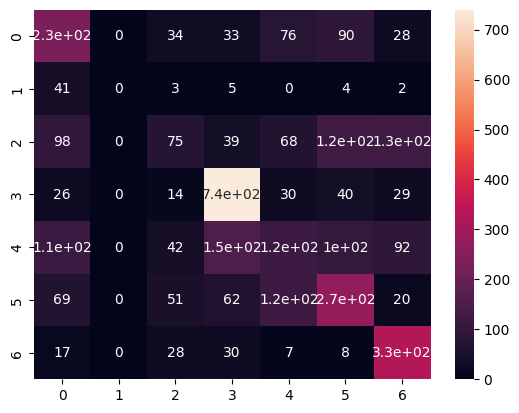

In [66]:
sns.heatmap(cm,annot=True)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(test.classes,forecasts))

              precision    recall  f1-score   support

           0       0.39      0.47      0.42       491
           1       0.00      0.00      0.00        55
           2       0.30      0.14      0.19       528
           3       0.70      0.84      0.76       879
           4       0.29      0.19      0.23       626
           5       0.42      0.46      0.44       594
           6       0.52      0.78      0.63       416

    accuracy                           0.49      3589
   macro avg       0.37      0.41      0.38      3589
weighted avg       0.45      0.49      0.46      3589



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


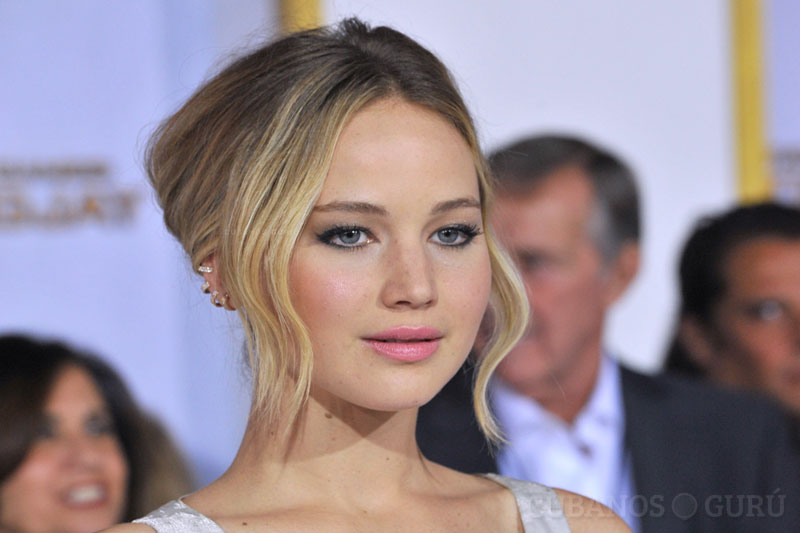

In [68]:
#Image Classification
#Single
image = cv2.imread('/content/Jennifer-Lawrence-2.png')
cv2_imshow(image)

In [69]:
image.shape

(533, 800, 3)

In [70]:
detector_face = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [71]:
original_image = image.copy()
deteccoes = detector_face.detectMultiScale(original_image)

In [72]:
deteccoes

array([[270, 131, 262, 262],
       [ 36, 406,  85,  85]], dtype=int32)

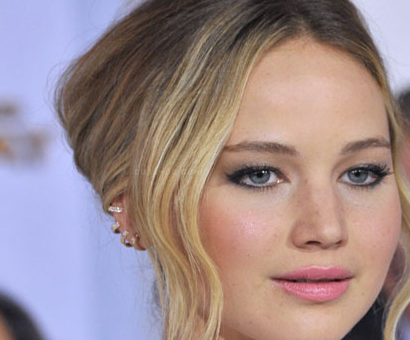

In [73]:
roi = image[60:280 + 120, 90:380 + 120]
cv2_imshow(roi)

In [74]:
roi.shape

(340, 410, 3)

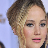

In [75]:
roi = cv2.resize(roi, (48,48))
cv2_imshow(roi)

In [76]:
roi.shape

(48, 48, 3)

array([[[237, 183, 175],
        [238, 183, 176],
        [238, 182, 177],
        ...,
        [236, 210, 204],
        [236, 208, 207],
        [236, 210, 205]],

       [[238, 184, 177],
        [239, 184, 177],
        [238, 183, 176],
        ...,
        [237, 212, 210],
        [237, 209, 208],
        [236, 208, 207]],

       [[238, 184, 177],
        [239, 184, 177],
        [239, 184, 177],
        ...,
        [238, 210, 209],
        [238, 209, 209],
        [234, 209, 207]],

       ...,

       [[ 68,  68,  87],
        [ 48,  42,  43],
        [ 54,  46,  47],
        ...,
        [109, 142, 171],
        [157, 152, 162],
        [116,  99, 107]],

       [[ 72,  89, 121],
        [ 55,  51,  60],
        [ 57,  46,  48],
        ...,
        [111, 148, 177],
        [113,  99, 104],
        [146, 115, 118]],

       [[ 91, 107, 149],
        [ 60,  62,  79],
        [ 50,  42,  43],
        ...,
        [112, 146, 175],
        [107,  93,  97],
        [160, 118, 122]]], dtype=uint8)
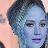

In [77]:
roi

In [78]:
roi = roi / 255
roi

array([[[0.92941176, 0.71764706, 0.68627451],
        [0.93333333, 0.71764706, 0.69019608],
        [0.93333333, 0.71372549, 0.69411765],
        ...,
        [0.9254902 , 0.82352941, 0.8       ],
        [0.9254902 , 0.81568627, 0.81176471],
        [0.9254902 , 0.82352941, 0.80392157]],

       [[0.93333333, 0.72156863, 0.69411765],
        [0.9372549 , 0.72156863, 0.69411765],
        [0.93333333, 0.71764706, 0.69019608],
        ...,
        [0.92941176, 0.83137255, 0.82352941],
        [0.92941176, 0.81960784, 0.81568627],
        [0.9254902 , 0.81568627, 0.81176471]],

       [[0.93333333, 0.72156863, 0.69411765],
        [0.9372549 , 0.72156863, 0.69411765],
        [0.9372549 , 0.72156863, 0.69411765],
        ...,
        [0.93333333, 0.82352941, 0.81960784],
        [0.93333333, 0.81960784, 0.81960784],
        [0.91764706, 0.81960784, 0.81176471]],

       ...,

       [[0.26666667, 0.26666667, 0.34117647],
        [0.18823529, 0.16470588, 0.16862745],
        [0.21176471, 0

In [79]:
roi.shape

(48, 48, 3)

In [80]:
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 48, 48, 3)

In [81]:
probs = network.predict(roi)
probs

1/1 [==============================] - 0s 468ms/step


array([[0.16250874, 0.01737825, 0.18790649, 0.06226579, 0.31952655,
        0.19635394, 0.05406012]], dtype=float32)

In [82]:
forecasts = np.argmax(probs)
forecasts

4

In [83]:
test.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

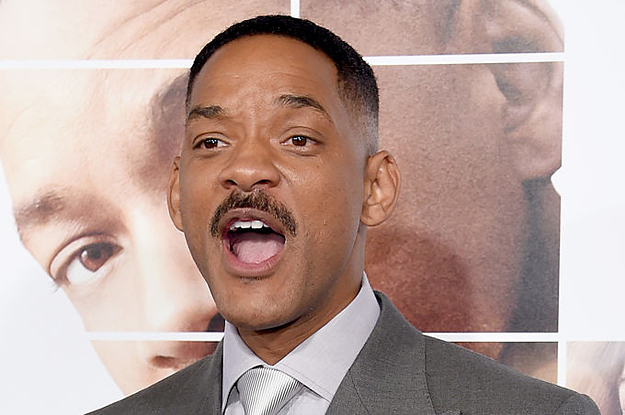

In [84]:
#Two
image = cv2.imread('/content/17-impresionantes-datos-de-celebridades-que-te-de-2-19568-1493914661-8_dblbig.png')
cv2_imshow(image)

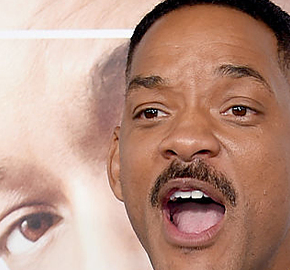

In [85]:
original_image = image.copy()
deteccoes = detector_face.detectMultiScale(original_image)
roi = image[30:200 + 100, 60:250 + 100]
cv2_imshow(roi)

In [86]:
roi = cv2.resize(roi, (48,48))
roi = roi / 255
roi = np.expand_dims(roi, axis = 0)
probs = network.predict(roi)
probs

1/1 [==============================] - 0s 41ms/step


array([[0.18188526, 0.02278923, 0.20041484, 0.30342302, 0.09636574,
        0.09735037, 0.09777158]], dtype=float32)

In [87]:
forecasts = np.argmax(probs)
forecasts

3

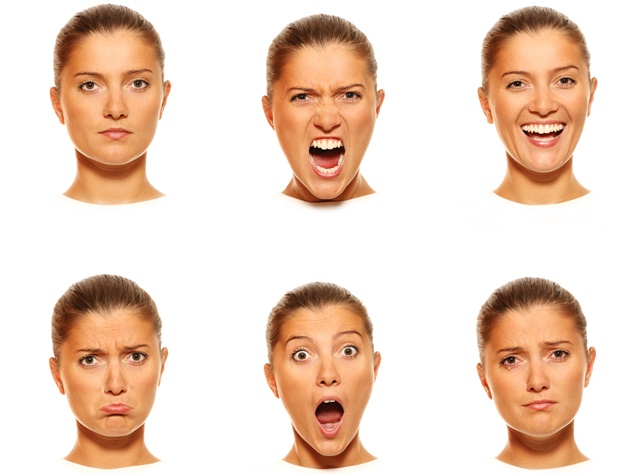

In [88]:
#Multiple
image = cv2.imread('/content/emocoes-trabalho.png')
cv2_imshow(image)


In [89]:
deteccoes = detector_face.detectMultiScale(image)
deteccoes

array([[ 54,  35, 122, 122],
       [481,  35, 118, 118],
       [266,  48, 122, 122],
       [487,  88, 118, 118],
       [475, 308, 122, 122],
       [ 52, 309, 123, 123],
       [265, 303, 124, 124]], dtype=int32)

In [90]:
test.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [91]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

1/1 [==============================] - 0s 56ms/step


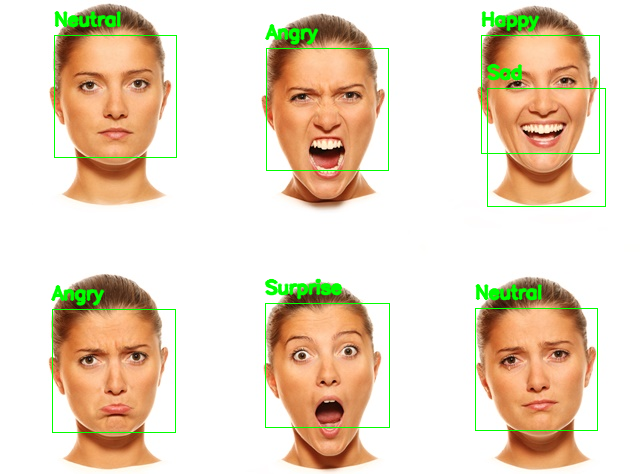

In [92]:
for (x, y, w, h) in deteccoes:

  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 1)
  roi = image[y:y + h, x:x + w]

  roi = cv2.resize(roi, (48,48))

  roi = roi / 255
  roi = np.expand_dims(roi, axis = 0)

  forecasts = network.predict(roi)

  cv2.putText(image, emotions[np.argmax(forecasts)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)
cv2_imshow(image)